## Installation the libabries to be use.

In [1]:
#installing all the libraries needed for the code
!pip3 install tensorflow
!pip3 install tensorflow-gpu
!pip3 install keras
!pip3 install tensorboard
!pip3 install tensorflow-estimator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.10.0
    Uninstalling tensorflow-estimator-2.10.0:
      Successfully uninstalled tensorflow-estimator-2.10.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 22.9.24
    Uninstalling flatbuffe

In [2]:
# importing libraries to be used 
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

##Data Gathering 


In [3]:
#connecting the google drive for the files 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##PREPROCESSING DATA

In [4]:
# re-size all the images to 224x 224 pixels for faster processing
IMAGE_SIZE = [224, 224]

#storing the path where the test and training dataset are located in the drive
train_path = '/content/drive/MyDrive/Covid19-dataset/train'
test_path = '/content/drive/MyDrive/Covid19-dataset/test'



#creating preprocessing layer for the data
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

##MODEL CREATION

In [5]:
#adding layers to the model (using all the possible models)
for layer in vgg.layers:
  layer.trainable = False

#storing the directory of the classifications of the dataset
folders = glob('/content/drive/MyDrive/Covid19-dataset/train/*')
folders

['/content/drive/MyDrive/Covid19-dataset/train/Normal',
 '/content/drive/MyDrive/Covid19-dataset/train/Covid',
 '/content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia']

In [6]:
# creating layers 
x = Flatten()(vgg.output)

#locating the classifications for the datasets
prediction = Dense(len(folders), activation='softmax')(x)

# creating model
model = Model(inputs=vgg.input, outputs=prediction)


In [7]:
# view the structure of the model
#view the different layers applied
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
# compiling the model given the parameters
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [9]:
# Importing all the training images to a variable

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# training sets data
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 249 images belonging to 3 classes.


In [11]:
#test sets data
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 65 images belonging to 3 classes.


In [12]:
#model fitting 
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
8/8 [==============================] - 192s 23s/step - loss: 1.5223 - accuracy: 0.4056 - val_loss: 0.5820 - val_accuracy: 0.7231
Epoch 2/10
8/8 [==============================] - 181s 23s/step - loss: 0.5006 - accuracy: 0.7751 - val_loss: 0.4546 - val_accuracy: 0.7538
Epoch 3/10
8/8 [==============================] - 177s 22s/step - loss: 0.3129 - accuracy: 0.8795 - val_loss: 0.2535 - val_accuracy: 0.8923
Epoch 4/10
8/8 [==============================] - 176s 23s/step - loss: 0.2344 - accuracy: 0.9197 - val_loss: 0.2034 - val_accuracy: 0.9231
Epoch 5/10
8/8 [==============================] - 176s 22s/step - loss: 0.1598 - accuracy: 0.9277 - val_loss: 0.1725 - val_accuracy: 0.9385
Epoch 6/10
8/8 [==============================] - 175s 22s/step - loss: 0.1306 - accuracy: 0.9558 - val_loss: 0.1564 - val_accuracy: 0.9385
Epoch 7/10
8/8 [==============================] - 176s 22s/step - loss: 0.0947 - accuracy: 0.9759 - val_loss: 0.1479 - val_accuracy: 0.9692
Epoch 8/10
8/8 [====

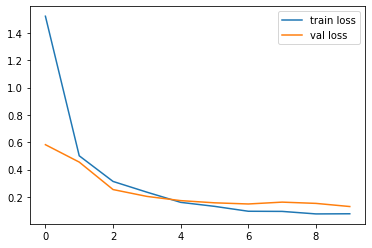

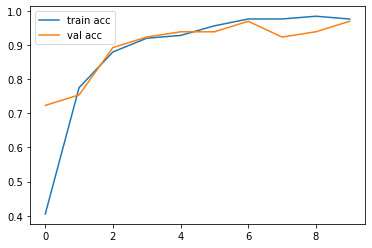

<Figure size 432x288 with 0 Axes>

In [13]:
# plotting loss of the model
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting the accuracy of the model
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
# save the model to be used for classification later
import tensorflow as tf
from keras.models import load_model

model.save('/content/drive/MyDrive/Colab Notebooks/modelvgg16.h5')

##Using the model for prediction

In [15]:
#prediction 

#libraries to be use
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model=load_model('/content/drive/MyDrive/Colab Notebooks/modelvgg16.h5')


#creating list of path of the images to be classify
directory=['/content/drive/MyDrive/Covid19-dataset/validation/pic1.jpeg',
           '/content/drive/MyDrive/Covid19-dataset/validation/pic2.jpeg',
           '/content/drive/MyDrive/Covid19-dataset/validation/pic3.jpeg',
           '/content/drive/MyDrive/Covid19-dataset/validation/pic4.jpeg',
           '/content/drive/MyDrive/Covid19-dataset/validation/pic5.jpeg',
           '/content/drive/MyDrive/Covid19-dataset/validation/pic6.jpeg',
           '/content/drive/MyDrive/Covid19-dataset/validation/pic7.jpg',
           '/content/drive/MyDrive/Covid19-dataset/validation/pic8.jpeg',
           '/content/drive/MyDrive/Covid19-dataset/validation/pic9.jpeg',
           '/content/drive/MyDrive/Covid19-dataset/validation/pic10.jpeg'
]

#looping to classify all the images 
prediction=[]
predbefore=[]
for direct in directory:
  img=image.load_img(direct,target_size=(224,224))
  x= image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  img_data=preprocess_input(x)
  classes = model.predict(img_data)
  new=classes[0]
  i=0
  image
  predbefore.append(new)
  for element in new:
    if round(element) ==1:
      if i==0:
        prediction.append("Covid")
      if i==1:
        prediction.append("Normal")
      if i==2:
        prediction.append("Viral")
    i=i+1

#displaying results of the prediction (pic1 to pic10)
print(prediction)

    

1/1 [==============================] - 1s 563ms/step
['Normal', 'Normal', 'Viral', 'Viral', 'Normal', 'Normal', 'Normal', 'Viral', 'Viral', 'Normal']
